2) (Based on problem 14.2) We assume a population of 9 independent Poisson neurons with Gaussian tuning curves and preferred orientations from -40 to 40 in steps of 10. The tuning curve parameters have values g=1, b=0, and sigma_tc=20. 
a) Draw the tuning curves.
b) A stimulus s=0 is presented to this population. What is the probability that all neurons stay silent?
  i) compute analytically; 
 ii) show by simulation that the analytical result is correct: Simulate the neuronal responses for s=0 on a very large number of trials. Count the number of trials on which all neurons were silent. The ratio of this number to the total number of trials should be equal to what you found in (i). 

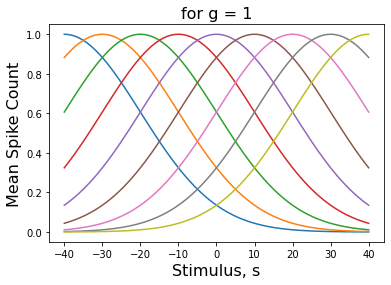

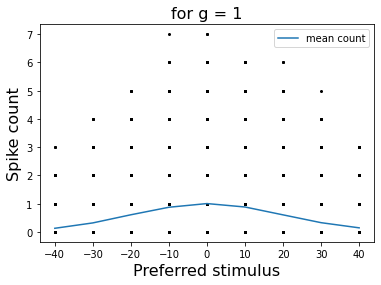

Theoretical result: 0.007461262629646418
Ratio from simulation for g=1: 0.0068


In [1]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

def tuningCurve(s,g,s_pref,sigma_tc,b):
  exponent = np.power(s-s_pref,2)/(2*sigma_tc*sigma_tc)
  return g*np.exp(-exponent)+b

nS = 81
s = np.linspace(-40,40,nS)

nTuningCurves = 9
g = 1
s_pref = np.linspace(-40,40,9)
sigma_tc = 20
b = 0

f_s_pop_all_s = np.zeros([nTuningCurves, nS])

for i in range(nTuningCurves):
  f_s_pop_all_s[i] = tuningCurve(s, g, s_pref[i], sigma_tc, b)
  plt.plot(s, f_s_pop_all_s[i] )

plt.xlabel("Stimulus, s", fontsize=16)
plt.ylabel("Mean Spike Count", fontsize=16)
plt.title("for g = 1", fontsize=16)
plt.show()


nTrials = 10000
stimulus_pop = 0

f_s_pop = np.zeros(nTuningCurves)
f_s_pop = tuningCurve(stimulus_pop, g, s_pref, sigma_tc, b)

spikeCounts = np.zeros([nTrials,nTuningCurves])
for i in np.arange(0,nTrials):
  spikeCounts[i] = poisson.rvs(f_s_pop)
  plt.plot(s_pref, spikeCounts[i], 'ko', markersize = 2)
plt.plot(s_pref, np.mean(spikeCounts, axis=0), label = 'mean count')
plt.xlabel("Preferred stimulus", fontsize = 16)
plt.ylabel("Spike count", fontsize = 16)
plt.title("for g = 1", fontsize=16)
plt.legend()
plt.show()


p = 0
for t in range(10000):
    if spikeCounts[t][0] == 0:
        if spikeCounts[t][1] == 0:
            if spikeCounts[t][2] == 0:
                if spikeCounts[t][3] == 0:
                    if spikeCounts[t][4] == 0:
                        if spikeCounts[t][5] == 0:
                            if spikeCounts[t][6] == 0:
                                if spikeCounts[t][7] == 0:
                                    if spikeCounts[t][8] == 0:
                                        p += 1       

resultt = 1
for u in range(9):
    resultt *= np.exp(-f_s_pop[u])
print("Theoretical result: {}".format(resultt))

ratio = p/10000
print("Ratio from simulation for g=1: {}".format(ratio))



 As you can see the experimental result is so similar to the theoretical result since the experimental one is randomized so there is always a some little error(which is less than 1% in that example) that can be acceptable.

c) Repat (a) & (b) for g = 10. Explain conceptually why you obtain a very different result here.

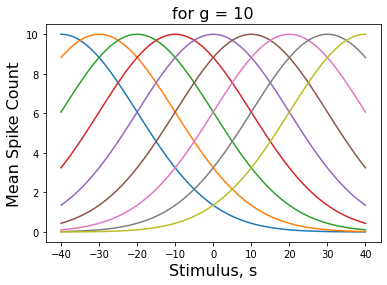

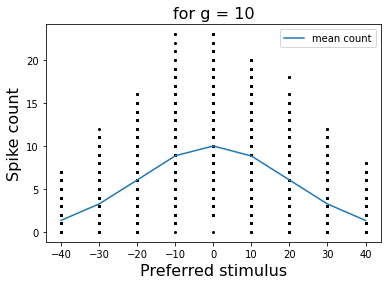

Theoretical result: 5.347161118544664e-22
Ratio from simulation for g=10: 0.0


In [2]:
# For g = 10

nS = 81
s = np.linspace(-40,40,nS)

nTuningCurves = 9
g = 10
s_pref = np.linspace(-40,40,9)
sigma_tc = 20
b = 0

f_s_pop_all_s = np.zeros([nTuningCurves, nS])

for i in range(nTuningCurves):
  f_s_pop_all_s[i] = tuningCurve(s, g, s_pref[i], sigma_tc, b)
  plt.plot(s, f_s_pop_all_s[i] )

plt.xlabel("Stimulus, s", fontsize=16)
plt.ylabel("Mean Spike Count", fontsize=16)
plt.title("for g = 10", fontsize=16)
plt.show()


nTrials = 10000
stimulus_pop = 0

f_s_pop = np.zeros(nTuningCurves)
f_s_pop = tuningCurve(stimulus_pop, g, s_pref, sigma_tc, b)

spikeCounts = np.zeros([nTrials,nTuningCurves])
for i in np.arange(0,nTrials):
  spikeCounts[i] = poisson.rvs(f_s_pop)
  plt.plot(s_pref, spikeCounts[i], 'ko', markersize = 2)
plt.plot(s_pref, np.mean(spikeCounts, axis=0), label = 'mean count')
plt.xlabel("Preferred stimulus", fontsize = 16)
plt.ylabel("Spike count", fontsize = 16)
plt.title("for g = 10", fontsize=16)
plt.legend()
plt.show()


p = 0
for t in range(10000):
    if spikeCounts[t][0] == 0:
        if spikeCounts[t][1] == 0:
            if spikeCounts[t][2] == 0:
                if spikeCounts[t][3] == 0:
                    if spikeCounts[t][4] == 0:
                        if spikeCounts[t][5] == 0:
                            if spikeCounts[t][6] == 0:
                                if spikeCounts[t][7] == 0:
                                    if spikeCounts[t][8] == 0:
                                        p += 1       

resultt = 1
for u in range(9):
    resultt *= np.exp(-f_s_pop[u])
print("Theoretical result: {}".format(resultt))

ratio = p/10000
print("Ratio from simulation for g=10: {}".format(ratio))

In here also there is a little error which is almost no between theoretical and experimental one. The differences between g=1 and g=10 is since the g coefficient is increased in g=10, the variance of corresponding spike count for each neuron which have specific stimulus preference is increased. Since the variance are increased, then the probabilities for a specific spike count to be observed by each neuron is decreased a lot when compared to g=1.